In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv('../data/clean_sales_data.csv')
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.head()

Dataset shape: (10000, 10)
Columns: ['date', 'product', 'region', 'salesperson', 'quantity', 'unit_price', 'total_sales', 'month', 'year', 'quarter']


,date,product,region,salesperson,quantity,unit_price,total_sales,month,year,quarter
0,2023-10-17,Product A,North,Bob Johnson,32,230.98,7391.36,10,2023,4
1,2022-04-15,Product E,North,Charlie Wilson,55,41.46,2280.30,4,2022,2
2,2022-04-06,Product B,South,Charlie Wilson,78,36.27,2829.06,4,2022,2
3,2022-07-23,Product E,West,Jane Smith,58,593.37,34415.46,7,2022,3
4,2022-01-07,Product B,West,Bob Johnson,36,163.92,5901.12,1,2022,1


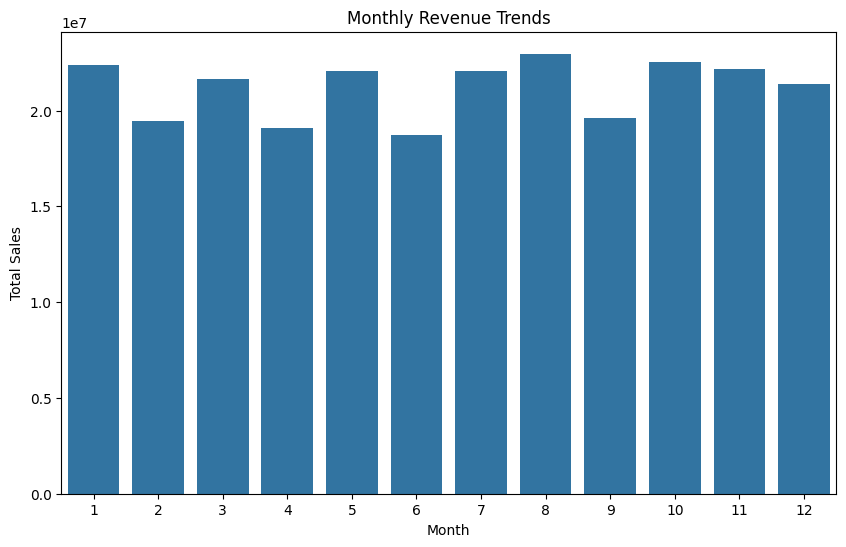

Total monthly sales:
month
1     22359012.69
2     19465092.22
3     21628887.20
4     19083394.44
5     22092013.17
6     18725713.29
7     22092867.29
8     22969738.06
9     19590094.89
10    22539079.84
11    22174046.48
12    21398162.89
Name: total_sales, dtype: float64


In [8]:
# Monthly Revenue Trends
monthly_sales = df.groupby('month')['total_sales'].sum().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title("Monthly Revenue Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

print(f"Total monthly sales:\n{monthly_sales}")

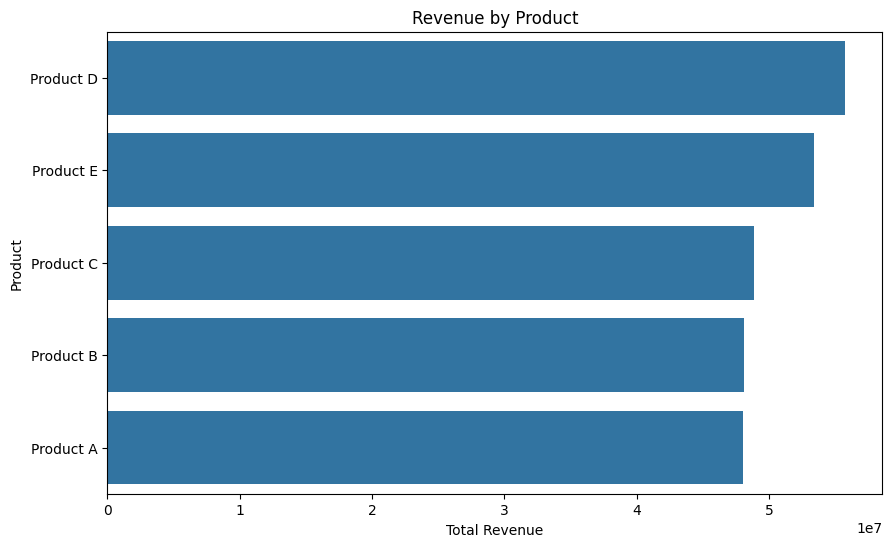

Product sales summary:
product
Product D    55763015.26
Product E    53376151.59
Product C    48831066.11
Product B    48122101.55
Product A    48025767.95
Name: total_sales, dtype: float64


In [9]:
# Best-selling Products
product_sales = df.groupby('product')['total_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=product_sales.values, y=product_sales.index)
plt.title("Revenue by Product")
plt.xlabel("Total Revenue")
plt.ylabel("Product")
plt.show()

print(f"Product sales summary:\n{product_sales}")

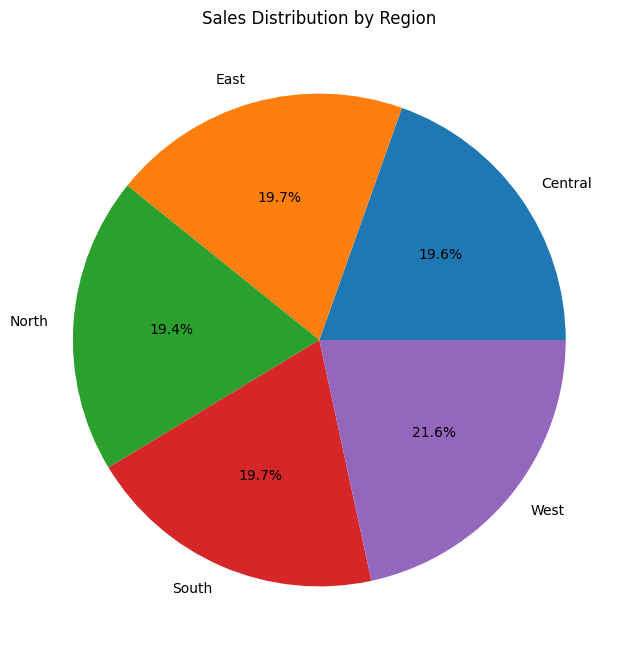

Regional sales summary:
region
Central    49701685.45
East       49947257.65
North      49417673.03
South      50134326.50
West       54917159.83
Name: total_sales, dtype: float64


In [10]:
# Sales by Region
regional_sales = df.groupby('region')['total_sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(regional_sales.values, labels=regional_sales.index, autopct='%1.1f%%')
plt.title("Sales Distribution by Region")
plt.show()

print(f"Regional sales summary:\n{regional_sales}")

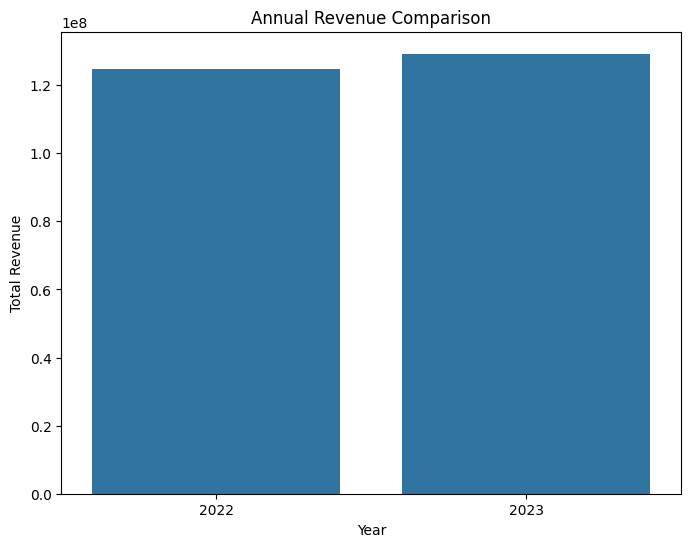

Annual Sales Summary:
year
2022    1.248876e+08
2023    1.292305e+08
Name: total_sales, dtype: float64
Growth from 2022 to 2023: 3.5%


In [11]:
# Year-over-Year Analysis
yearly_sales = df.groupby('year')['total_sales'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title("Annual Revenue Comparison")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.show()

print("Annual Sales Summary:")
print(yearly_sales)

# Calculate year-over-year growth
if len(yearly_sales) > 1:
    years = sorted(yearly_sales.index)
    for i in range(1, len(years)):
        current_year = years[i]
        previous_year = years[i-1]
        growth = ((yearly_sales[current_year] - yearly_sales[previous_year]) / yearly_sales[previous_year]) * 100
        print(f"Growth from {previous_year} to {current_year}: {growth:.1f}%")